In [2]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator

simulator_basic = BasicSimulator()

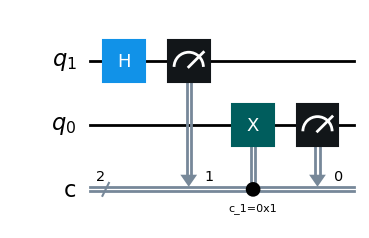

In [3]:
qc = QuantumCircuit(2,2)
qc.h(1)
qc.measure(1,1)
qc.x(0).c_if(1,1)
qc.measure(0,0)
qc.draw()

In [5]:
job = simulator_basic.run(qc, shots=1024)
result = job.result()
print(result)

Result(backend_name='basic_simulator', backend_version='0.1', qobj_id='7ba10cd9-5787-4853-9585-3bbf81a5be17', job_id='935356ff-47e4-4acf-bfb9-79b7e18ba021', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 519, '0x0': 505}), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1]], n_qubits=2, qreg_sizes=[['q', 2]], clbit_labels=[['c', 0], ['c', 1]], memory_slots=2, creg_sizes=[['c', 2]], name='circuit-160', global_phase=0.0, metadata={}), status=DONE, name='circuit-160', seed_simulator=1214100929, time_taken=0.11211919784545898)], date=None, status=COMPLETED, header=QobjHeader(backend_name='basic_simulator', backend_version='0.1'), time_taken=0.11214208602905273)


In [6]:
counts = result.get_counts()
print(counts)

{'11': 519, '00': 505}


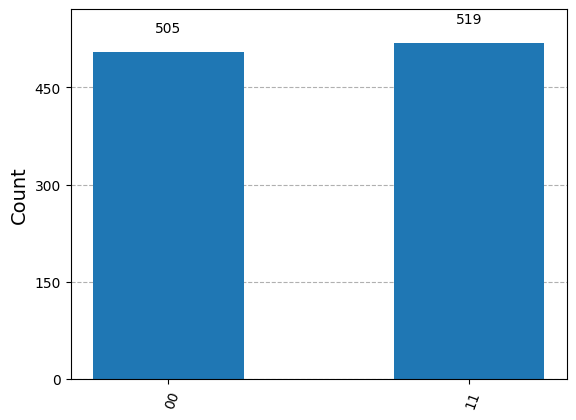

In [9]:
from qiskit.visualization import plot_histogram, plot_distribution
plot_histogram(counts)

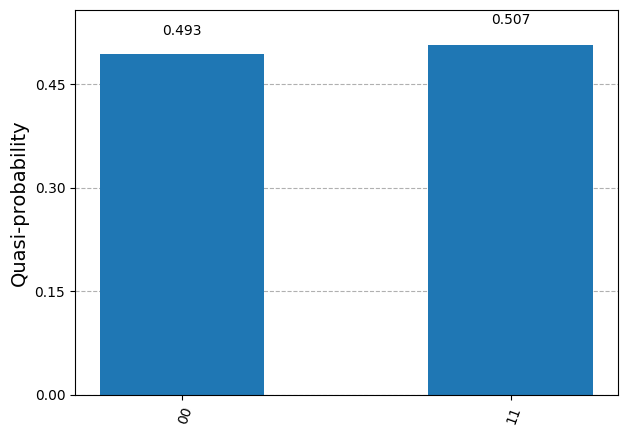

In [10]:
plot_distribution(counts)

In [12]:
job = simulator_basic.run(qc, shots=10, memory=True)
result = job.result()
samples = result.get_memory()
print(samples)

['00', '00', '00', '00', '11', '00', '11', '11', '00', '11']


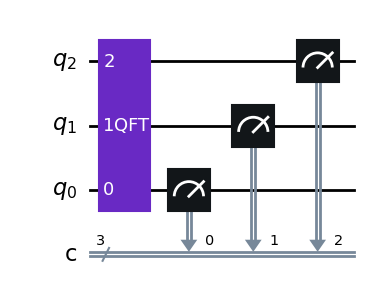

In [14]:
from qiskit.circuit.library import QFT

qc = QuantumCircuit(3,3)
qc.append(QFT(3), range(3))
qc.measure(range(3),range(3))
qc.draw()

In [15]:
job = simulator_basic.run(qc, shots=1024)

BasicProviderError: 'basic_simulator encountered unrecognized operation "QFT"'

Need to transpile

In [16]:
from qiskit import transpile

qc_transpiled = transpile(qc, backend=simulator_basic)

job = simulator_basic.run(qc_transpiled)

In [17]:
result = job.result()
counts = result.get_counts()
print(counts)

{'001': 136, '000': 132, '100': 99, '101': 129, '011': 138, '111': 137, '010': 123, '110': 130}
